In [1]:
import kagglehub

# Downloading the latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)


100%|██████████| 121M/121M [00:01<00:00, 93.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [2]:
import os

# Defining the correct dataset path
dataset_path = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1"

# Checking the directory structure at the root level
print("Dataset contents:", os.listdir(dataset_path))




Dataset contents: ['images']


In [3]:
# Defining the path to the 'images' folder
images_dir = os.path.join(dataset_path, 'images')

# Checking the contents inside the 'images' folder
print("Images directory contents:", os.listdir(images_dir))


Images directory contents: ['train', 'validation', 'images']


In [4]:
# Checking the contents of 'train' and 'validation' directories
train_dir = os.path.join(images_dir, 'train')
validation_dir = os.path.join(images_dir, 'validation')

# Also Listing the contents of both directories
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(validation_dir))


Train directory contents: ['neutral', 'fear', 'surprise', 'happy', 'sad', 'angry', 'disgust']
Validation directory contents: ['neutral', 'fear', 'surprise', 'happy', 'sad', 'angry', 'disgust']


In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator is part of tf.keras
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import load_img, img_to_array # Use tensorflow.keras.utils for load_img and img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

###Displaying some images

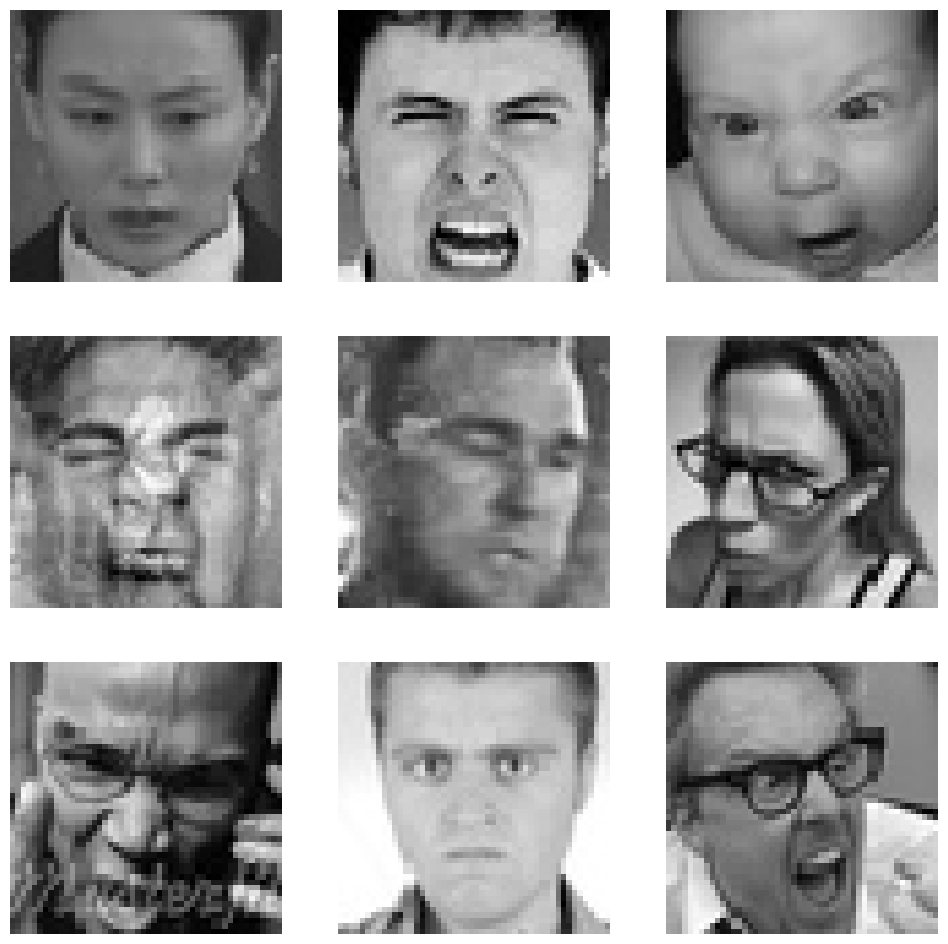

In [10]:

folder_path = '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/'
picture_size = (50, 50)  # 48x48 image size

# Expression to display, I will be picking angry
expression = 'angry'

# Plotting the images
plt.figure(figsize=(12, 12))
for i in range(1, 10):
    # Getting the image file path
    img_path = os.path.join(folder_path, 'train', expression, os.listdir(os.path.join(folder_path, 'train', expression))[i])

    # Loading the image and display it
    img = load_img(img_path, target_size=picture_size)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.axis('off')  # It will Hide axis

plt.show()

#Data Augmentation (To prevent overfitting)

In [15]:


# Defining image dimensions
picture_size = (48, 48)  # 48x48 image size
img_width, img_height = picture_size  # Unpack the tuple


train_set = datagen.flow_from_directory(folder_path+"train",
                                              target_size = (img_width, img_height),  # Pass width and height directly
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen.flow_from_directory(folder_path+"validation",
                                              target_size = (img_width, img_height),  # Pass width and height directly
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

# ... (rest of your code) ...

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#Displaying the generated data

(128, 48, 48, 1)
(128, 48, 48, 1)
(128, 48, 48, 1)
(128, 48, 48, 1)


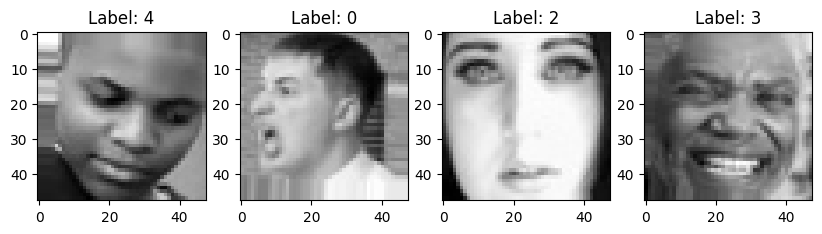

In [18]:
plt.figure(figsize= (10,10))
for i in range(1,5,1):
    img, label = next(train_set)
    print(img.shape)
    plt.subplot(3,4,i)
    plt.imshow(img[1,:,:,0], cmap='gray') # Displaying the image with grayscale colormap
    plt.title(f"Label: {np.argmax(label[1])}") # Displaying the label of the image
plt.show()

#CNN Architecture

In [19]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

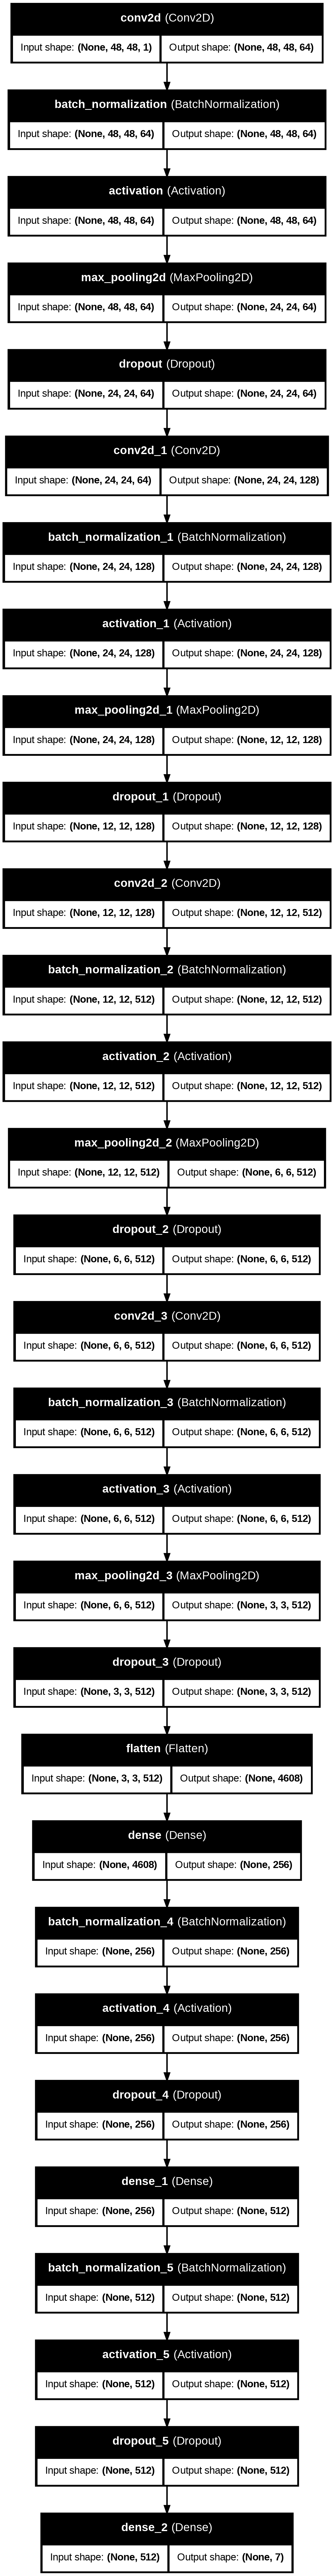

In [22]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=1000, height=3000)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

#Saving Model by checkpoint

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


#Compiling the model

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

#Training the model

In [26]:
history = model.fit(x=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=10,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1711s 8s/step - accuracy: 0.2265 - loss: 2.0357 - val_accuracy: 0.2598 - val_loss: 2.4671 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 22:59 6s/step - accuracy: 0.3672 - loss: 1.6213

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 404ms/step - accuracy: 0.3672 - loss: 1.6213 - val_accuracy: 0.2601 - val_loss: 2.4538 - learning_rate: 0.0010
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1701s 8s/step - accuracy: 0.3521 - loss: 1.6697 - val_accuracy: 0.3206 - val_loss: 1.8515 - learning_rate: 0.0010
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 147s 628ms/step - accuracy: 0.4219 - loss: 1.3856 - val_accuracy: 0.3232 - val_loss: 1.8319 - learning_rate: 0.0010
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1696s 8s/step - accuracy: 0.4272 - loss: 1.4769 - val_accuracy: 0.4482 - val_loss: 1.4192 - learning_rate: 0.0010
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 143s 611ms/step - accuracy: 0.4844 - loss: 1.4382 - val_accuracy: 0.4418 - val_loss: 1.4390 - learning_rate: 0.0010
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1718s 7s/step - accuracy: 0.4720 - loss: 1.3636 - val_accuracy: 0.4935 - val_loss: 1.3083 - learning_rate: 0.0010
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 143s 602ms/step - accuracy: 0.5234 - loss:

Predict one value from test_set

(128, 48, 48, 1)
(48, 48, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step
sad
class:5


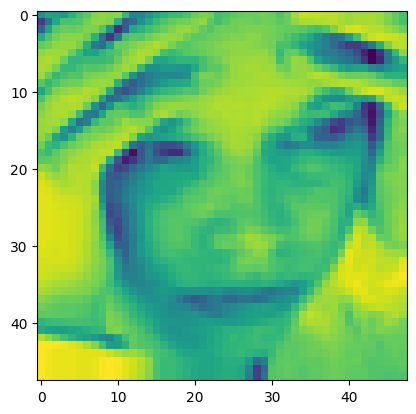

In [35]:
img, label = test_set[11]
print(img.shape)
print(img[11].shape)

plt.imshow(img[11])

y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis=1)

# Defining class_names based on our dataset labels
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Replace with your actual class names

print(class_names[y_pred[0]])
print('class:'+ str(y_pred[0]))

#Display Stats

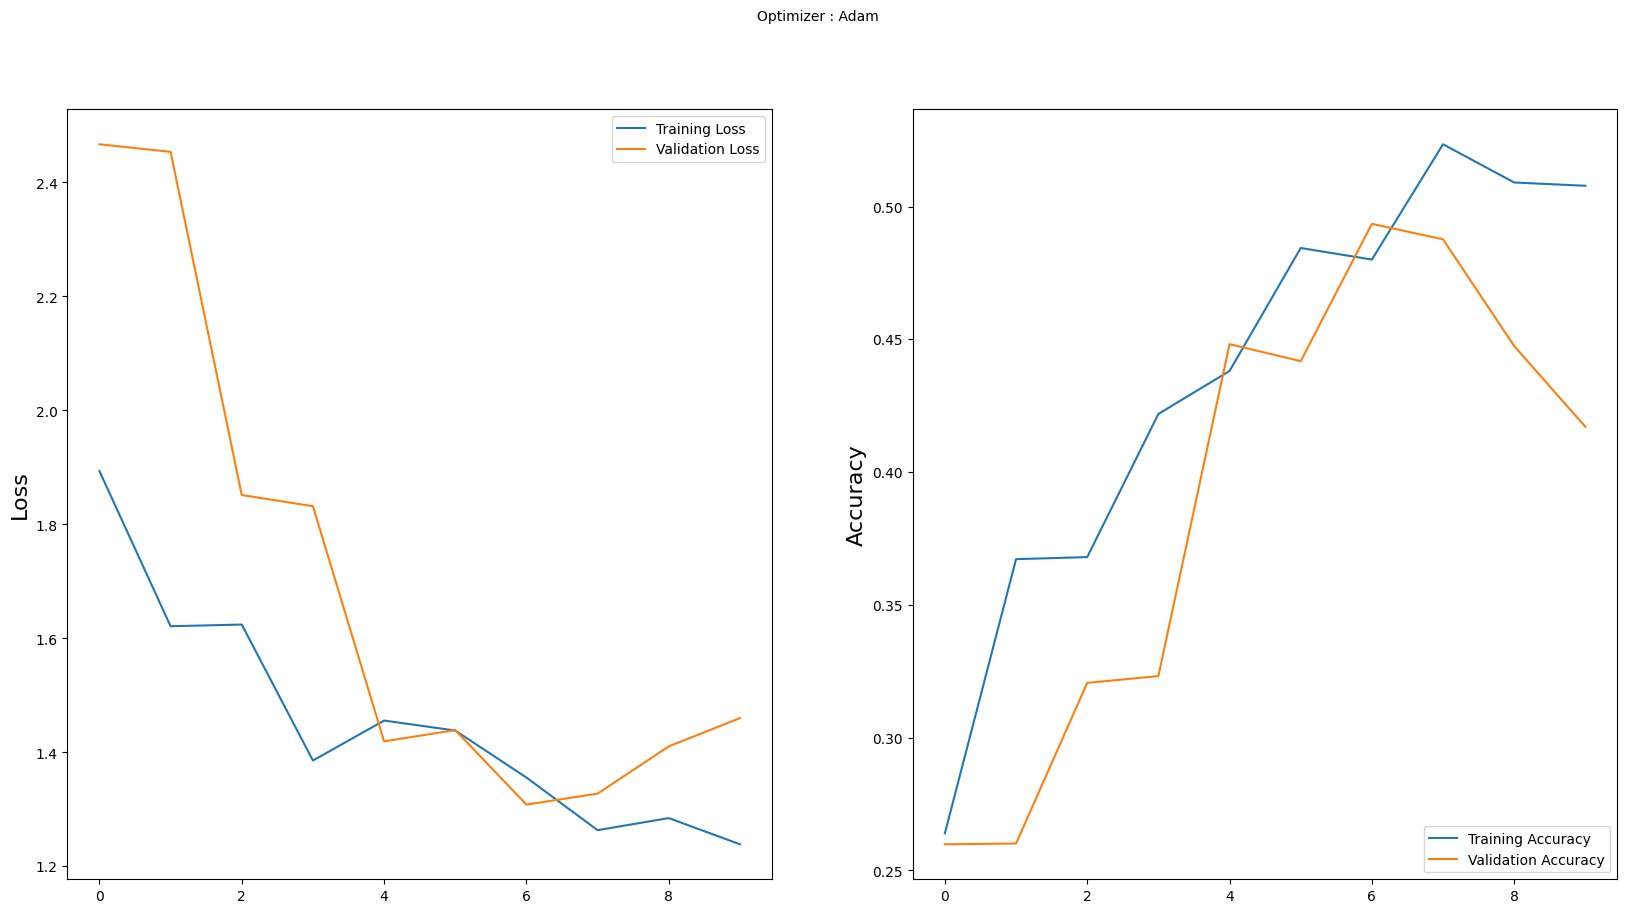

In [36]:



plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [37]:
#Accuracy of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#Loss of the model
loss = history.history['loss']
val_loss = history.history['val_loss']




In [38]:
#printing accuracy of the model
print("Accuracy of the model is: ", acc)



Accuracy of the model is:  [0.2639319598674774, 0.3671875, 0.3679642975330353, 0.421875, 0.43805110454559326, 0.484375, 0.48001253604888916, 0.5234375, 0.5090439915657043, 0.5078125]


In [41]:
## List of accuracy values from different steps
acc1= history.history['accuracy']
acc2= history.history['val_accuracy']
print(acc1)
print(acc2)

[0.2639319598674774, 0.3671875, 0.3679642975330353, 0.421875, 0.43805110454559326, 0.484375, 0.48001253604888916, 0.5234375, 0.5090439915657043, 0.5078125]
[0.25980114936828613, 0.26008522510528564, 0.3205966055393219, 0.32315340638160706, 0.44815340638160706, 0.4417613744735718, 0.4934659004211426, 0.4876420497894287, 0.4474431872367859, 0.4170454442501068]


In [43]:


# List of accuracy values from different steps
acc1 = [0.2639319598674774, 0.3671875, 0.3679642975330353, 0.421875, 0.43805110454559326, 0.484375, 0.48001253604888916, 0.5234375, 0.5090439915657043, 0.5078125]
acc2 = [0.25980114936828613, 0.26008522510528564, 0.3205966055393219, 0.32315340638160706, 0.44815340638160706, 0.4417613744735718, 0.4934659004211426, 0.4876420497894287, 0.4474431872367859, 0.4170454442501068]

# Calculate overall accuracy by taking the mean of the lists
overall_training_accuracy = np.mean(acc1)
overall_validation_accuracy = np.mean(acc2)

# Calculate total overall accuracy as the average of training and validation accuracy
overall_accuracy = (overall_training_accuracy + overall_validation_accuracy) / 2

# Printing the overall accuracy
print("Overall training accuracy:", overall_training_accuracy)
print("Overall validation accuracy:", overall_validation_accuracy)
print("Overall accuracy of the model:", overall_accuracy)


Overall training accuracy: 0.43636913895606994
Overall validation accuracy: 0.3899147748947144
Overall accuracy of the model: 0.41314195692539213


Our model achieved **43.6% training accuracy** and **38.9% validation accuracy**, resulting in an **overall accuracy of 41.3%**. While the model is learning, the gap between training and validation accuracy suggests some generalization issues. To improve performance, we can try further tuning, enhanced data augmentation, or experimenting with different architectures. We're on the right track—let's keep optimizing! 🚀